In [1]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

## ANN

1- craete model.

2- fetch data.

3- model train, validation and optimization.

4- model test and scoring.

5- repeat steps 3 and 4 for the normalized data.




<h2>1 create model</h2>

In [2]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier()

In [3]:
from sklearn import set_config

set_config(display="diagram")
display(ann_model)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


<h2>2 fetch data</h2>

In [4]:
X_train_norm = pd.read_csv('../data/processed/X_train_norm.csv')
X_valid_norm = pd.read_csv('../data/processed/X_valid_norm.csv')
X_test_norm = pd.read_csv('../data/processed/X_test_norm.csv')

X_train = pd.read_csv('../data/processed/X_train.csv')
X_valid = pd.read_csv('../data/processed/X_valid.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv')
y_valid = pd.read_csv('../data/processed/y_valid.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


<h2>3 model train, validation and optimization</h2>

In [5]:
ann_model.fit(X_train,y_train)
score = ann_model.score(X_valid,y_valid)
print(f'Model Score: {score}')

Model Score: 0.5609756097560976


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
param_grid_ann = {
    "hidden_layer_sizes": [(50,),(100,) , (50,50)],
    "activation" : ["tanh" , "relu"],
    "solver": ["sgd" , "adam"],
    "alpha" : [.0001, .001 , .01],
    "learning_rate_init": [.001 , .01]
}

In [9]:
from sklearn.model_selection import GridSearchCV

grid_search_ann = GridSearchCV(
    ann_model,
    param_grid= param_grid_ann,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [10]:
grid_search_ann.fit(X_train,y_train)

valid_score_1 = grid_search_ann.score(X_valid , y_valid)

print("best score of train set: " + str(grid_search_ann.best_score_))
print("best parameter set: " + str(grid_search_ann.best_params_))
print("validation score: " + str(valid_score_1))



Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/P

best score of train set: 0.6884493670886076
best parameter set: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
validation score: 0.6991869918699187


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/P

In [11]:
y_pred_ann = grid_search_ann.best_estimator_.predict(X_valid)

In [12]:
y_valid = np.array(y_valid["Loan_Status"])

In [14]:
from sklearn.metrics import precision_score , recall_score , f1_score

precision_ann = precision_score(y_valid, y_pred_ann , pos_label='Y')
recall_ann = recall_score(y_valid , y_pred_ann, pos_label='Y')

#f1_ann
valid_score_2 = f1_score(y_valid , y_pred_ann, pos_label='Y')


print(f'validation_precision_score: {precision_ann:.3f}')
print(f'validation_recall score: {recall_ann:.3f}')
print(f'validation_F-1 score: {valid_score_2:.3f}')

validation_precision_score: 0.711
validation_recall score: 0.953
validation_F-1 score: 0.814


In [15]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation data: {progress}')

model progress on validation data: 0.11488335988887521


<h3>select grid_search_ann as final model for test</h3>

In [16]:
y_pred_ann = grid_search_ann.best_estimator_.predict(X_test)
y_test = np.array(y_test["Loan_Status"])

In [17]:

precision_ann = precision_score(y_test, y_pred_ann , pos_label='Y')
recall_ann = recall_score(y_test , y_pred_ann,pos_label='Y')

#f1_ann
f1_ann= f1_score(y_test , y_pred_ann, pos_label='Y')


print(f'test_precision_score: {precision_ann:.3f}')
print(f'test_recall score: {recall_ann:.3f}')
print(f'test_F-1 score: {f1_ann:.3f}')

test_precision_score: 0.701
test_recall score: 0.953
test_F-1 score: 0.808


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix_ann = confusion_matrix(y_test , y_pred_ann)

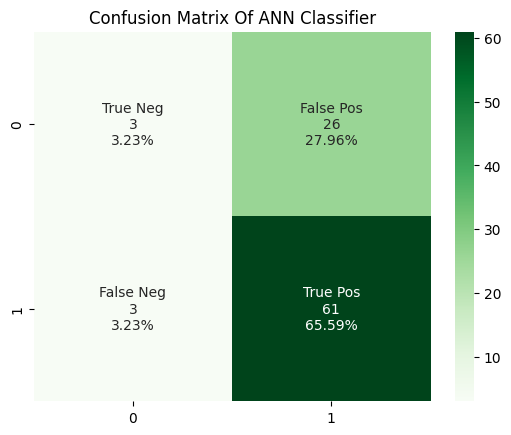

In [19]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_ann.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_ann.flatten() / np.sum(confusion_matrix_ann)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_ann, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of ANN Classifier")
plt.savefig("../reports/figures/confusion_matrix_ANN.png", dpi=300)

plt.show()


<h2>5- repeat steps 3 and 4 for the normalized data.</h2>

In [20]:
ann_model.fit(X_train_norm,y_train)
score = ann_model.score(X_valid_norm,y_valid)
print(f'Model Score norm: {score}')

Model Score norm: 0.7642276422764228


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
param_grid_ann = {
    "hidden_layer_sizes": [(50,),(100,) , (50,50)],
    "activation" : ["tanh" , "relu"],
    "solver": ["sgd" , "adam"],
    "alpha" : [.0001, .001 , .01],
    "learning_rate_init": [.001 , .01]
}

In [25]:

grid_search_ann = GridSearchCV(
    ann_model,
    param_grid= param_grid_ann,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [26]:
grid_search_ann.fit(X_train_norm,y_train)

valid_score_1 = grid_search_ann.score(X_valid_norm , y_valid)

print("best score of train set norm: " + str(grid_search_ann.best_score_))
print("best parameter set norm: " + str(grid_search_ann.best_params_))
print("validation score norm: " + str(valid_score_1))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/P

best score of train set norm: 0.798860759493671
best parameter set norm: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'solver': 'sgd'}
validation score norm: 0.7723577235772358


In [27]:
y_pred_ann = grid_search_ann.best_estimator_.predict(X_valid_norm)


In [28]:

precision_ann = precision_score(y_valid, y_pred_ann , pos_label='Y')
recall_ann = recall_score(y_valid , y_pred_ann, pos_label='Y')

#f1_ann
valid_score_2 = f1_score(y_valid , y_pred_ann, pos_label='Y')


print(f'validation_precision_score norm: {precision_ann:.3f}')
print(f'validation_recall score norm: {recall_ann:.3f}')
print(f'validation_F-1 score norm: {valid_score_2:.3f}')

validation_precision_score norm: 0.777
validation_recall score norm: 0.941
validation_F-1 score norm: 0.851


In [29]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation normalized data: {progress}')

model progress on validation normalized data: 0.0787061062099983


In [30]:
y_pred_ann = grid_search_ann.best_estimator_.predict(X_test_norm)


In [31]:

precision_ann = precision_score(y_test, y_pred_ann , pos_label='Y')
recall_ann = recall_score(y_test , y_pred_ann,pos_label='Y')

#f1_log
f1_ann= f1_score(y_test , y_pred_ann, pos_label='Y')


print(f'test_precision_score norm: {precision_ann:.3f}')
print(f'test_recall score norm: {recall_ann:.3f}')
print(f'test_F-1 score norm: {f1_ann:.3f}')

test_precision_score norm: 0.827
test_recall score norm: 0.969
test_F-1 score norm: 0.892


In [32]:

confusion_matrix_ann = confusion_matrix(y_test , y_pred_ann)

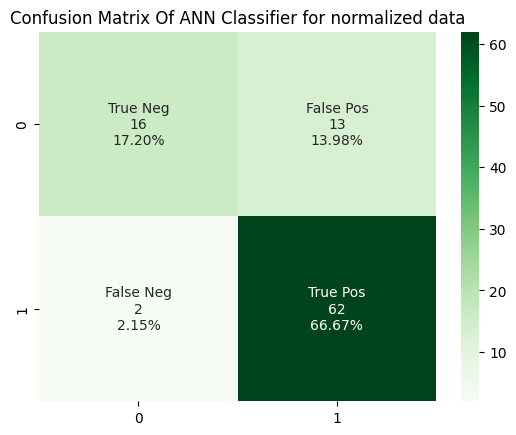

In [33]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_ann.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_ann.flatten() / np.sum(confusion_matrix_ann)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_ann, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of ANN Classifier for normalized data")
plt.savefig("../reports/figures/confusion_matrix_ANN_normalized_data.png", dpi=300)

plt.show()

In [34]:
import joblib

joblib.dump(
    grid_search_ann.best_estimator_,
    "../models/grid_search_ann.joblib"
)

['../models/grid_search_ann.joblib']

########